In [1]:
# Interactive shell of Ipython is used to execute multiple statements at a time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import operator
from wordcloud import WordCloud
import pandas as pd

import re
import os
import tweepy as tw
import spacy
import en_core_web_sm
#nlp = spacy.load("en_core_web_sm")
nlp = en_core_web_sm.load()
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

## Why Use Twitter?

There are many reasons why Twitter is used as a source for information associated with a disturbance including:

### Data from mixed sources:

Anyone can use Twitter and thus the sources of information can include media, individuals, official and others.
Mixed sources of information provides a more well-rounded perspective of the impacts of the particular event and the actions being taken to deal with that event.

### Embedded content:

Twitter allows users to embed pictures, videos and more to capture various elements of a disturbance both visually and quantitatively.

### Instantaneous coverage:

Twitter allows users to communicate directly in real time. Thus, reports on what is going on during an event can happen as the incident unfolds.

## The Structure of a Tweet

There are various components of a tweet that you can use to extract information:

User Name: This is how each unique user is identified.

Time Stamp: When the tweet was sent.

Tweet Text: The body of the tweet - needs to be 140 characters of less!

Hashtags: Always proceeded by a # symbol. A hashtag is often describes a particular event or can be related to a particular 
topic.

Links: Links can be embedded within a tweet. Links are a way that users share information.

Embedded Media: tweets can contain pictures and videos. The most popular tweets often contain pictures.

Replies: When someone posts a tweet, another user can reply directly to that user - similar to a text message except the 
message is visible to the public.

Retweets: a retweet is when someone shares a tweet with their followers.

Favorites: You can “like” a tweet to keep a history of content that you like in your account.

Latitude/Longitude: about 1% of all tweets contains coordinate information.

## Define the Keys and authenticate to connect Twitter API

In [3]:
consumer_key= 'XXXX'
consumer_secret= 'XXXX'

access_token= 'XXXX'
access_token_secret= 'XXXX'

bearer_token='XXXX'

In [4]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

## Search the hashtag that you want to pull the tweets and Analyse

In [65]:
search_term = "#covid+vaccination -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2021-04-25').items(5000)

In [66]:
all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

[]

## Remove the URL and punctuautions from the text/tweet

In [58]:
def remove_url(txt):
    """Replace URLs found in a text string with spaces

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
## use below regular expression depending on your requirement

## this will remove URL and will return the txt string 
#    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())    

## this will remove the txt string totally that contains URL 
    return " ".join(re.sub(r'(http[^ ]*)|(www\.[^ ]*)|[^0-9A-Za-z \t]'," ", txt).split())

In [59]:
all_tweets_no_urls = []
for tweet in all_tweets:
    all_tweets_no_urls.append(remove_url(tweet))

#all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['India records 3 60 960 new Covid cases death toll crosses 2 lakh mark MoHFW INDIA drharshvardhan WHO',
 'In times like these our employee s health has been our major concern Hence to ensure their safety we organized o',
 'Get yourself and your family VACCINATED covid coronavirus covid 19 corona vaccination virus staysafe',
 'On 26th April 2 6 million had vaccine for covid Total 148mn need faster vaccination at this moment',
 'Your daily reminder please get your COVID VAX as soon as you can Went two days ago to get mine at the']

In [60]:
df = pd.DataFrame(all_tweets_no_urls,columns=['Tweet'])

In [61]:
df

,Tweet
0,India records 3 60 960 new Covid cases death t...
1,In times like these our employee s health has ...
2,Get yourself and your family VACCINATED covid ...
3,On 26th April 2 6 million had vaccine for covi...
4,Your daily reminder please get your COVID VAX ...
...,...
942,as 4 24 21 this is how COVID is playing out di...
943,well it s officially 24 hrs since my Moderna c...
944,Coronavirus Africa s vaccination rollout off t...
945,Nigeria Steps Up vaccination Efforts After Slo...


## Copy the cleaned tweets into a file

In [62]:
df.to_csv('tweets_on_Covid_Vaccine.csv', index = False)

## Buils the lexicon for sentiment Analysis . Also display the World Cloud with word frequencies

In [7]:

def build_lex_dict(file):
    ''' This method/Function will create a Lexicon dictionary'''
    df = pd.read_csv(file,encoding='latin-1',header = None)
    lex_resource = df.values
    lex_dict = {}
    for pair in lex_resource:
        lex_dict[pair[0]] = pair[1]
    return lex_dict


def sentiment_analysis(tweets_msg):
    ''' this method/function will call spam_scoreto get the predicted sentiments based on lexicon '''
    sentiment = []
    
    for tweet in tweets_msg:
        s1 = tweet.replace(',','').lower().split()
        sentiment.append(spam_score(s1))
    return sentiment        
        
def spam_score(sent):
    ''' this method/function will create sentiment score/lable based on lexicon '''
    score = 0
    
    words=sent
    #compute the score of each token beased on lexicon
    for word in words:
        word = word.lower()
        if word in lexicon:
            score = score + lexicon[word]
            
    # compute the sentiment and return        
    if score < 0:
        sent = 'negative'
    elif score > 0:
        sent = 'positive'
    else:
        sent = 'neutral'
    return sent


def wordfreq(lst):
    ''' This method will get the word frequency from the tokens'''
    word_freq = {}
    for tok in lst:
        if tok.lower() in word_freq:
            word_freq[tok.lower()]+=1
        else:
            word_freq[tok.lower()]=1
    return word_freq


def word_dict(word_dict):
    ''' This method/function will sort the word dictionary in descending order of counts of each token'''
    sorted_d = sorted(word_dict.items(), key=operator.itemgetter(1),reverse=True)
#    print(sorted_d)

    
def sw_declare_removal(word_list):
    all_stopwords = stopwords.words('english')     ## from NLTK library
    spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS    ## from spacy
#    tokens_without_sw = [word for word in word_list if not word in all_stopwords]  ## we can use this lambda expression also
    sw = ['the','#','a','you','to','and','of','in','=','is','that','if','it','class="sister"','can','for','or','as','this','<a',
          'but','with','are','use','will','by','on','not','be','an','all','your','only','&','-','|','us','00','up','Rs','rs',
          '00Rs','₹','rs.','viruses','coronaviruses','speeches','was','me','so','my','have','had','i','at','our' ,'speech:',
          'english','more','class','what','…','when','could','thing','you.','same','s','how','do','go','we','do','out','here',
         'read','take','h2f','f','care','covid','covid19','amp','pm','am','last','like','day','days','19','time','one','new','3'
         ,'get','news','know','due','6','see','6','23','5','u','via','back','vaccines','got','eu','vaccinated','1','2',
         '1st','2nd',"a", "about", "above", "across", "after", "afterwards", "again", "all", "almost", "alone", "along",
          "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
          "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "as", "at", "be", "became", "because", "become",
          "becomes", "becoming", "been", "before", "behind", "being", "beside", "besides", "between", "beyond", "both", "but",
          "by","can", "cannot", "cant", "could", "couldnt", "de", "describe", "do", "done", "each", "eg", "either", "else",
          "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "find","for",
          "found", "four", "from", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her",
          "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however",
          "i", "ie", "if", "in", "indeed", "is", "it", "its", "itself", "keep", "least", "less", "ltd", "made", "many", "may",
          "me", "meanwhile", "might", "mine", "more", "moreover", "most", "mostly", "much", "must", "my", "myself", "name",
          "namely", "neither", "never", "nevertheless", "next","no", "nobody", "none", "noone", "nor", "not", "nothing", "now",
          "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
          "ours", "ourselves", "out", "over", "own", "part","perhaps", "please", "put", "rather", "re", "same", "see", "seem",
          "seemed", "seeming", "seems", "she", "should","since", "sincere","so", "some", "somehow", "someone", "something",
          "sometime", "sometimes", "somewhere", "still", "such", "take","than", "that", "the", "their", "them", "themselves",
          "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they","this",
          "those", "though", "through", "throughout","thru", "thus", "to", "together", "too", "toward", "towards","under",
          "until", "up", "upon", "us","very", "was", "we", "well", "were", "what", "whatever", "when","whence", "whenever", 
          "where", "whereafter", "whereas", "whereby","wherein", "whereupon", "wherever", "whether", "which", "while", "who",
          "whoever", "whom", "whose", "why", "will", "with","within", "without", "would", "yet", "you", "your", "yours", 
          "yourself", "yourselves",'doses','18','vaccine','vaccination']
    all_stopwords.extend(sw)

    word_list2 = {}
    for word,v in word_list.items():
        if word not in all_stopwords:
            if word not in spacy_stopwords:
                word_list2.update({word:v})
    return word_list2
        

def freq_dist_plot(words):
    ''' This method/Function is will plot a Frequency distribution plot for the word frequency'''
    Freq_dist_nltk=nltk.FreqDist(words)
    print(Freq_dist_nltk)
    
    sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
    Freq_dist_nltk.plot(25, cumulative=False)
    return Freq_dist_nltk
 
def bar_plot(word_list_new):   
    sorted_d = sorted(word_list_new.items(), key=operator.itemgetter(1),reverse=True)
#    print(sorted_d[:15])
    dict_of_words = dict(sorted_d[:15])
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.bar(range(len(dict_of_words)), list(dict_of_words.values()),color="purple")  #, align='center')
    plt.xticks(range(len(dict_of_words)), list(dict_of_words.keys()),rotation=90)
    ax.set_title("Frequent Words Found in Tweets")
    plt.show()

    
def wordcloud(Freq_dist_nltk):
    ''' This method/Function will plot word cloud visualization'''
    wordcloud = WordCloud().generate_from_frequencies(Freq_dist_nltk)
    # Display the generated image:
    # the matplotlib way:
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

In [8]:
def Visualize_URL(tweets_msg):
    
    total_words = []
    for tweet in tweets_msg:
        s1 = tweet.replace(',','').lower().split()
        total_words.extend(s1)
    
    tokens = total_words
    
    ## Create Word frequencies
    word_list = wordfreq(tokens)
    
    ### Stop word declare and removal
    word_list_new = sw_declare_removal(word_list)
        
    ## Check the word list Dictionary in descending order by value
    word_dict(word_list_new)
    
    ## Freq dist plot   
    Freq_dist_nltk = freq_dist_plot(word_list_new)
    
    ## bar plot
    bar_plot(word_list_new)

    # Create Word cloud Visualization
    wordcloud(Freq_dist_nltk)
    
    ## finding sentiment score
    sentiment = sentiment_analysis(tweets_msg)
    return sentiment

<FreqDist with 5533 samples and 16558 outcomes>


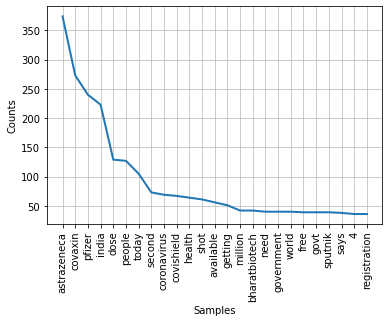

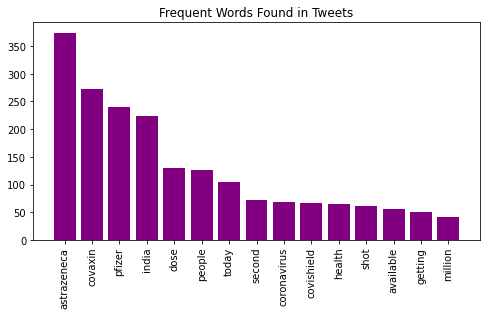

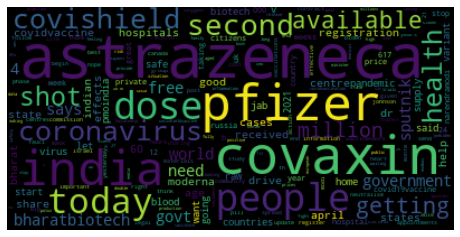

In [9]:
# Generate a Sentiment analysis and word cloud image

    # create Lexicon Dictionary
file = 'AFINN-111.csv'
lexicon = build_lex_dict(file)


df_text = pd.read_excel('Tweets_on_Covid_Vaccine.xlsx')
#df_text.head()

tweets_msg = df_text['Tweet'].values
#tweets

URL_wordcloud = Visualize_URL(tweets_msg)
#URL_wordcloud

In [12]:
## Append the sentiment/score predictions to the dataframe
df_text['predicted'] = URL_wordcloud

In [13]:
df_text.head()

,Tweet,Label,predicted
0,India records 3 60 960 new Covid cases death t...,Negative,negative
1,In times like these our employee s health has ...,Positive,positive
2,Get yourself and your family VACCINATED covid ...,Neutral,neutral
3,On 26th April 2 6 million had vaccine for covi...,Negative,neutral
4,Your daily reminder please get your COVID VAX ...,Neutral,positive


In [14]:
pd.crosstab(df_text['predicted'],df_text['Label'])

Label,Negative,Neutral,Positive
predicted,,,
negative,223,113,95
neutral,225,382,310
positive,111,178,363


In [ ]:
### Identify the positive and Negative word cloud

In [10]:
df_text = pd.read_excel('Tweets_on_Covid_Vaccine.xlsx')

df_text_pos_neu = df_text[df_text['Label'] != 'Negative']
df_text_neg_neu = df_text[df_text['Label'] != 'Positive']

df_text_pos = df_text_pos_neu[df_text_pos_neu['Label'] != 'Neutral']
df_text_neg = df_text_neg_neu[df_text_neg_neu['Label'] != 'Neutral']
df_text_neu = df_text_pos_neu[df_text_pos_neu['Label'] != 'Positive']

df_text_pos.head()
df_text_neg.head()

,Tweet,Label
1,In times like these our employee s health has ...,Positive
6,COVID 19 Vaccines confidence and benefits of v...,Positive
7,Get your First Dose of Vaccination From May 1s...,Positive
11,There are currently 51candidates Out of which ...,Positive
13,Registration for the third phase of Covid vacc...,Positive


,Tweet,Label
0,India records 3 60 960 new Covid cases death t...,Negative
3,On 26th April 2 6 million had vaccine for covi...,Negative
8,COVID nurse explains becoming a whistleblower ...,Negative
10,The pictures coming out of India are just hear...,Negative
14,The court observed that different vaccination ...,Negative


<FreqDist with 2776 samples and 6452 outcomes>


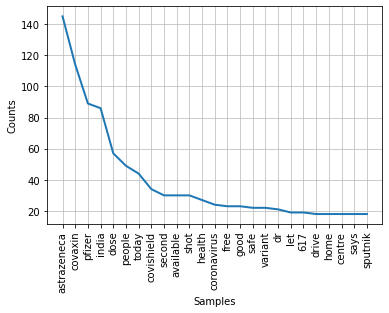

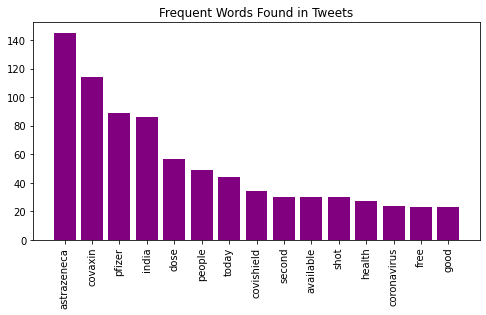

<FreqDist with 2379 samples and 4674 outcomes>


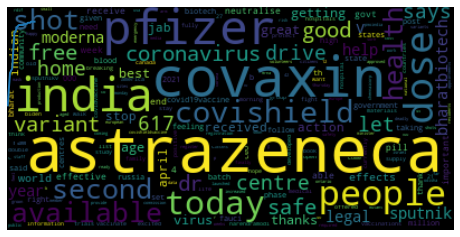

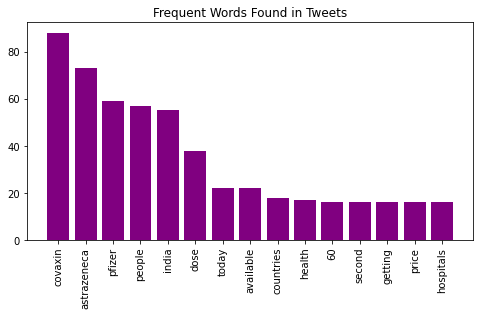

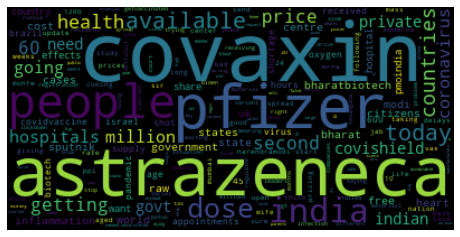

In [12]:
tweets_msg_pos = df_text_pos['Tweet'].values

tweets_msg_neg = df_text_neg['Tweet'].values


URL_wordcloud_pos = Visualize_URL(tweets_msg_pos)

URL_wordcloud_neg = Visualize_URL(tweets_msg_neg)


In [13]:
## Pie chart for number of positive, negative and Neutral

768

559

673

[None, None, None, None, None, None]

Text(0.5, 1.0, 'Different types of Twitter Sentiments on Vaccination')

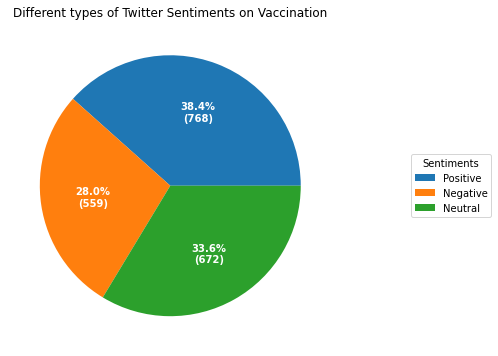

In [14]:
import numpy as np

Positive_sum = (df_text_pos['Label'] == 'Positive').count()
Negative_sum = (df_text_neg['Label'] == 'Negative').count()
Neutral_sum = (df_text_neu['Label'] == 'Neutral').count()
Positive_sum
Negative_sum
Neutral_sum


sum_all = [Positive_sum, Negative_sum, Neutral_sum]

pie_labels = ['Positive', 'Negative', 'Neutral']
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(sum_all, autopct=lambda pct: func(pct, sum_all), textprops=dict(color='w'))
ax.legend(wedges, pie_labels, title='Sentiments', loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight="bold")
ax.set_title('Different types of Twitter Sentiments on Vaccination')
#plt.pie(absen, labels=pie_labels)
plt.show()

## Modelling

In [6]:
df=pd.read_excel('Tweets_on_Covid_Vaccine_500_rows.xlsx')

## Lexicon based sentiment Analysis

In [73]:
def sentiment_analysis(tweets_msg):
    ''' this method/function will call sentiment_score get the predicted sentiments based on lexicon '''
    sentiment = []
    
    for tweet in tweets_msg:
        s1 = tweet.replace(',','').lower().split()
        sentiment.append(sentiment_score(s1))
    return sentiment        
        
def sentiment_score(sent):
    ''' this method/function will create sentiment score/lable based on lexicon '''
    score = 0
    
    words=sent
    #compute the score of each token beased on lexicon
    for word in words:
        word = word.lower()
        if word in lexicon:
            score = score + lexicon[word]
            
    # compute the sentiment and return        
    if score < 0:
        sent = 'negative'
    elif score > 0:
        sent = 'positive'
    else:
        sent = 'neutral'
    return sent

In [74]:
tweets_msg = df['Tweet'].values
sentiment = sentiment_analysis(tweets_msg)
## Append the sentiment/score predictions to the dataframe
df['predicted'] = sentiment
pd.crosstab(df['predicted'],df['Label'])

Label,Negative,Neutral,Positive
predicted,,,
negative,60,26,23
neutral,53,85,99
positive,34,44,76


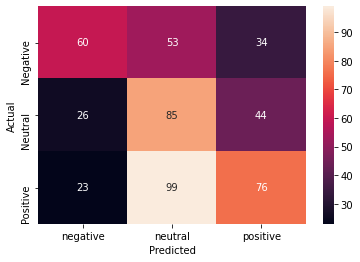

In [75]:
conf_matrix = pd.crosstab(df['Label'], df['predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

In [77]:
print("Accuracy with LX model : ", (60+85+76)/500)
print('TP rate with LX model: ', 76/(23+99+76))
print('TN rate with LX model: ', 34/(60+53+34))
print("            ")

Accuracy with LX model :  0.442
TP rate with LX model:  0.3838383838383838
TN rate with LX model:  0.23129251700680273
            


In [8]:
df['Tweet'] = df['Tweet'].astype(str)
df['Tweet_lc'] = df['Tweet'].str.lower()

In [9]:
x = df['Tweet_lc']
y = df['Label'] 

## Using Count Vectorizer

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(x)
#print(vectorizer.get_feature_names())
#X
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
## Get the data
## split the data
## build model on train data
## Validate on test data
## check the results

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# lets see the shape of our train and test datasets

print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (400, 2262)
X_test shape: (100, 2262)


## Naive Bayes based sentiment Analysis

MultinomialNB()

              precision    recall  f1-score   support

    Negative       0.48      0.46      0.47        26
     Neutral       0.41      0.48      0.44        23
    Positive       0.65      0.61      0.63        51

    accuracy                           0.54       100
   macro avg       0.51      0.52      0.51       100
weighted avg       0.55      0.54      0.54       100

Accuracy:  0.54
[[12  3 11]
 [ 6 11  6]
 [ 7 13 31]]


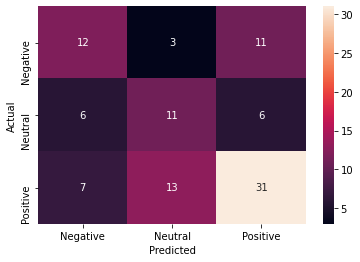

In [9]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)
pred_nb = nb.predict(X_test)
print(classification_report(y_test,pred_nb))
print('Accuracy: ',metrics.accuracy_score(y_test, pred_nb))
print(confusion_matrix(y_test, pred_nb))

conf_matrix = pd.crosstab(y_test, pred_nb, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

# roc plot

#fig,ax = plt.subplots(figsize=(7,7))
#plot_roc_curve(nb, X_test, y_test, ax = ax)

## SVC based sentiment Analysis

SVC()

              precision    recall  f1-score   support

    Negative       0.55      0.23      0.32        26
     Neutral       0.36      0.43      0.39        23
    Positive       0.54      0.65      0.59        51

    accuracy                           0.49       100
   macro avg       0.48      0.44      0.44       100
weighted avg       0.50      0.49      0.48       100

Accuracy:  0.49
[[ 6  3 17]
 [ 2 10 11]
 [ 3 15 33]]


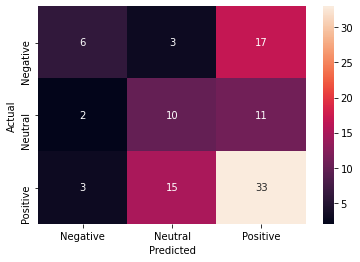

In [10]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
pred_svm = svm.predict(X_test)
print(classification_report(y_test,pred_svm))

print('Accuracy: ',metrics.accuracy_score(y_test, pred_svm))

print(confusion_matrix(y_test, pred_svm))

conf_matrix = pd.crosstab(y_test, pred_svm, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

#fig,ax = plt.subplots(figsize=(7,7))
#plot_roc_curve(svm, X_test, y_test, ax = ax)

## Random Forest based sentiment Analysis

RandomForestClassifier()

              precision    recall  f1-score   support

    Negative       0.58      0.27      0.37        26
     Neutral       0.48      0.65      0.56        23
    Positive       0.63      0.71      0.67        51

    accuracy                           0.58       100
   macro avg       0.57      0.54      0.53       100
weighted avg       0.59      0.58      0.56       100

Accuracy:  0.58
[[ 7  4 15]
 [ 2 15  6]
 [ 3 12 36]]


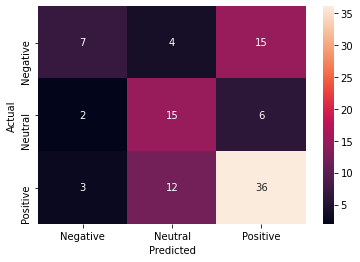

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
print(classification_report(y_test,pred_rf))

print('Accuracy: ',metrics.accuracy_score(y_test, pred_rf))

print(confusion_matrix(y_test, pred_rf))

conf_matrix = pd.crosstab(y_test, pred_rf, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

#fig,ax = plt.subplots(figsize=(7,7))
#plot_roc_curve(rf, X_test, y_test, ax = ax)

## Deep learning(MLP) based sentiment Analysis

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        26
     Neutral       0.00      0.00      0.00        23
    Positive       0.51      1.00      0.68        51

    accuracy                           0.51       100
   macro avg       0.17      0.33      0.23       100
weighted avg       0.26      0.51      0.34       100

Accuracy:  0.51
[[ 0  0 26]
 [ 0  0 23]
 [ 0  0 51]]


C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


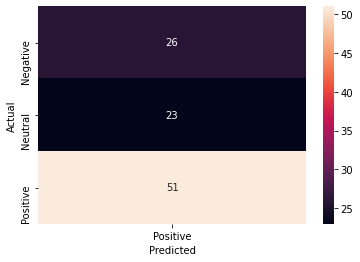

In [12]:
from sklearn.neural_network import MLPClassifier
dl = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1)
dl.fit(X_train,y_train)
pred_dl = dl.predict(X_test)
print(classification_report(y_test,pred_dl))

print('Accuracy: ',metrics.accuracy_score(y_test, pred_dl))

print(confusion_matrix(y_test, pred_dl))


conf_matrix = pd.crosstab(y_test, pred_dl, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

## Compare results

In [62]:
print("Accuracy with LX model : ", (60+85+76)/500)
print("            ")
print("Accuracy with NB model: ", (12+11+31)/100)
print('TP rate with NB model: ', 31/(7+13+31))
print("            ")
print("Accuracy with SVC : ", (6+10+33)/100)
print('TP rate with SVC model: ', 33/(3+15+33))
print("            ")
print("Accuracy with RF : ", (4+14+32)/100)
print('TP rate with RF model: ', 32/(4+15+32))
print("            ")
print("Accuracy with DL : ", 0/1)
print('TP rate with DL model: ', 0/1)

Accuracy with LX model :  0.442
            
Accuracy with NB model:  0.54
TP rate with NB model:  0.6078431372549019
            
Accuracy with SVC :  0.49
TP rate with SVC model:  0.6470588235294118
            
Accuracy with RF :  0.5
TP rate with RF model:  0.6274509803921569
            
Accuracy with DL :  0.0
TP rate with DL model:  0.0


## using TF-IDF Vectorizer

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)
#print(vectorizer.get_feature_names())

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# lets see the shape of our train and test datasets

print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (400, 2262)
X_test shape: (100, 2262)


MultinomialNB()

              precision    recall  f1-score   support

    Negative       0.60      0.12      0.19        26
     Neutral       0.38      0.39      0.38        23
    Positive       0.54      0.75      0.62        51

    accuracy                           0.50       100
   macro avg       0.50      0.42      0.40       100
weighted avg       0.52      0.50      0.46       100

Accuracy:  0.5
[[ 3  3 20]
 [ 1  9 13]
 [ 1 12 38]]


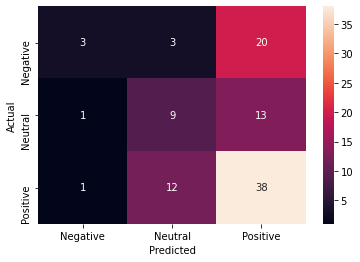

In [15]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)
pred_nb = nb.predict(X_test)
print(classification_report(y_test,pred_nb))
print('Accuracy: ',metrics.accuracy_score(y_test, pred_nb))
print(confusion_matrix(y_test, pred_nb))

conf_matrix = pd.crosstab(y_test, pred_nb, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

SVC()

              precision    recall  f1-score   support

    Negative       0.50      0.12      0.19        26
     Neutral       0.41      0.39      0.40        23
    Positive       0.54      0.76      0.63        51

    accuracy                           0.51       100
   macro avg       0.48      0.42      0.41       100
weighted avg       0.50      0.51      0.46       100

Accuracy:  0.51
[[ 3  3 20]
 [ 1  9 13]
 [ 2 10 39]]


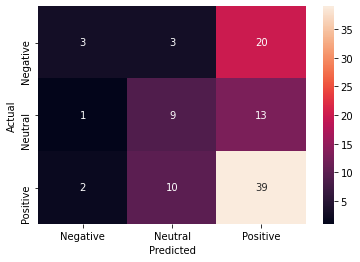

In [16]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
pred_svm = svm.predict(X_test)
print(classification_report(y_test,pred_svm))

print('Accuracy: ',metrics.accuracy_score(y_test, pred_svm))

print(confusion_matrix(y_test, pred_svm))

conf_matrix = pd.crosstab(y_test, pred_svm, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

RandomForestClassifier()

              precision    recall  f1-score   support

    Negative       0.50      0.31      0.38        26
     Neutral       0.46      0.70      0.55        23
    Positive       0.61      0.59      0.60        51

    accuracy                           0.54       100
   macro avg       0.52      0.53      0.51       100
weighted avg       0.55      0.54      0.53       100

Accuracy:  0.54
[[ 8  4 14]
 [ 2 16  5]
 [ 6 15 30]]


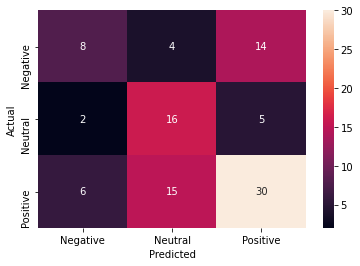

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
print(classification_report(y_test,pred_rf))

print('Accuracy: ',metrics.accuracy_score(y_test, pred_rf))

print(confusion_matrix(y_test, pred_rf))

conf_matrix = pd.crosstab(y_test, pred_rf, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        26
     Neutral       0.00      0.00      0.00        23
    Positive       0.51      1.00      0.68        51

    accuracy                           0.51       100
   macro avg       0.17      0.33      0.23       100
weighted avg       0.26      0.51      0.34       100

Accuracy:  0.51
[[ 0  0 26]
 [ 0  0 23]
 [ 0  0 51]]


C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


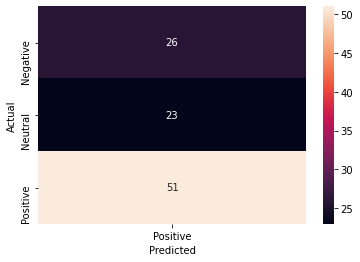

In [18]:
from sklearn.neural_network import MLPClassifier
dl = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1)
dl.fit(X_train,y_train)
pred_dl = dl.predict(X_test)
print(classification_report(y_test,pred_dl))

print('Accuracy: ',metrics.accuracy_score(y_test, pred_dl))

print(confusion_matrix(y_test, pred_dl))

conf_matrix = pd.crosstab(y_test, pred_dl, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

In [64]:
print("Accuracy with LX model : ", (60+85+76)/500)
print("            ")
print("Accuracy with NB model: ", (3+8+38)/100)
print('TP rate with NB model: ', 38/(1+12+38))
print("            ")
print("Accuracy with SVC : ", (3+9+39)/100)
print('TP rate with SVC model: ', 39/(2+10+39))
print("            ")
print("Accuracy with RF : ", (8+16+27)/100)
print('TP rate with RF model: ', 27/(7+17+27))
print("            ")
print("Accuracy with DL : ", 0/1)
print('TP rate with DL model: ', 0/1)

Accuracy with LX model :  0.442
            
Accuracy with NB model:  0.49
TP rate with NB model:  0.7450980392156863
            
Accuracy with SVC :  0.51
TP rate with SVC model:  0.7647058823529411
            
Accuracy with RF :  0.51
TP rate with RF model:  0.5294117647058824
            
Accuracy with DL :  0.0
TP rate with DL model:  0.0


## Using Grid Search CV

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# lets see the shape of our train and test datasets

print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (400,)
X_test shape: (100,)


dict_keys(['alpha', 'class_prior', 'fit_prior'])
dict_keys(['memory', 'steps', 'verbose', 'transformer', 'clf', 'transformer__memory', 'transformer__steps', 'transformer__verbose', 'transformer__vect', 'transformer__tfidf', 'transformer__vect__analyzer', 'transformer__vect__binary', 'transformer__vect__decode_error', 'transformer__vect__dtype', 'transformer__vect__encoding', 'transformer__vect__input', 'transformer__vect__lowercase', 'transformer__vect__max_df', 'transformer__vect__max_features', 'transformer__vect__min_df', 'transformer__vect__ngram_range', 'transformer__vect__preprocessor', 'transformer__vect__stop_words', 'transformer__vect__strip_accents', 'transformer__vect__token_pattern', 'transformer__vect__tokenizer', 'transformer__vect__vocabulary', 'transformer__tfidf__norm', 'transformer__tfidf__smooth_idf', 'transformer__tfidf__sublinear_tf', 'transformer__tfidf__use_idf', 'clf__alpha', 'clf__class_prior', 'clf__fit_prior'])


GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        Pipeline(steps=[('vect',
                                                         CountVectorizer()),
                                                        ('tfidf',
                                                         TfidfTransformer())])),
                                       ('clf', MultinomialNB())]),
             param_grid={'transformer__tfidf__use_idf': (True, False),
                         'transformer__vect__max_features': [None, 1800, 1500]})

{'transformer__tfidf__use_idf': True, 'transformer__vect__max_features': 1500}

              precision    recall  f1-score   support

    Negative       0.50      0.12      0.19        26
     Neutral       0.41      0.39      0.40        23
    Positive       0.54      0.76      0.63        51

    accuracy                           0.51       100
   macro avg       0.48      0.42      0.41       100
weighted avg       0.50      0.51      0.46       100

Accuracy:  0.49
[[ 2  3 21]
 [ 3 10 10]
 [ 2 12 37]]


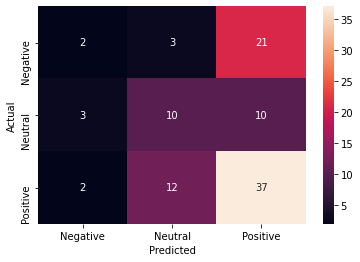

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

parameters = {'transformer__vect__max_features': [None,1800, 1500],
#              'transformer__vect__ngram_range': ((1,1),(1,2)),
              'transformer__tfidf__use_idf': (True, False)}


nb = MultinomialNB()
estimator = nb
pipeline = Pipeline([
    ('transformer', Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer())
    ])), ('clf', nb)
])

print(estimator.get_params().keys())
print(pipeline.get_params().keys())

grid = GridSearchCV(pipeline, param_grid = parameters)

grid.fit(X_train,y_train)

pred_nb = grid.predict(X_test)


#Take a look at the best prediction parameter
y_predBest = grid.best_params_
y_predBest

print(classification_report(y_test,pred_svm))
print('Accuracy: ',metrics.accuracy_score(y_test, pred_nb))
print(confusion_matrix(y_test, pred_nb))


conf_matrix = pd.crosstab(y_test, pred_nb, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)
# roc plot

#fig,ax = plt.subplots(figsize=(7,7))
#plot_roc_curve(nb, X_test, y_test, ax = ax)

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
dict_keys(['memory', 'steps', 'verbose', 'transformer', 'clf', 'transformer__memory', 'transformer__steps', 'transformer__verbose', 'transformer__vect', 'transformer__tfidf', 'transformer__vect__analyzer', 'transformer__vect__binary', 'transformer__vect__decode_error', 'transformer__vect__dtype', 'transformer__vect__encoding', 'transformer__vect__input', 'transformer__vect__lowercase', 'transformer__vect__max_df', 'transformer__vect__max_features', 'transformer__vect__min_df', 'transformer__vect__ngram_range', 'transformer__vect__preprocessor', 'transformer__vect__stop_words', 'transformer__vect__strip_accents', 'transformer__vect__token_pattern', 'transformer__vect_

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        Pipeline(steps=[('vect',
                                                         CountVectorizer()),
                                                        ('tfidf',
                                                         TfidfTransformer())])),
                                       ('clf', RandomForestClassifier())]),
             param_grid={'transformer__tfidf__use_idf': (True, False),
                         'transformer__vect__max_features': [1800, 1500]})

1.0

0.53

              precision    recall  f1-score   support

    Negative       0.38      0.23      0.29        26
     Neutral       0.43      0.65      0.52        23
    Positive       0.65      0.63      0.64        51

    accuracy                           0.53       100
   macro avg       0.49      0.50      0.48       100
weighted avg       0.53      0.53      0.52       100

Accuracy:  0.53
[[ 6  8 12]
 [ 3 15  5]
 [ 7 12 32]]


{'transformer__tfidf__use_idf': True, 'transformer__vect__max_features': 1500}

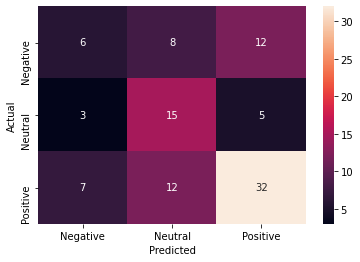

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

parameters = {'transformer__vect__max_features': [1800, 1500],
#              'transformer__vect__ngram_range': ((1,1),(1,2)),
              'transformer__tfidf__use_idf': (True, False)}


rf = RandomForestClassifier()

pipeline = Pipeline([
    ('transformer', Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer())
    ])), ('clf', rf)
])

estimator = rf
print(estimator.get_params().keys())
print(pipeline.get_params().keys())

grid = GridSearchCV(pipeline, param_grid = parameters)

grid.fit(X_train,y_train)


grid.score(X_train,y_train)
grid.score(X_test,y_test)

pred_rf = grid.predict(X_test)

print(classification_report(y_test,pred_rf))

print('Accuracy: ',metrics.accuracy_score(y_test, pred_rf))

print(confusion_matrix(y_test, pred_rf))


conf_matrix = pd.crosstab(y_test, pred_rf, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

#Take a look at the best prediction parameter
y_predBest = grid.best_params_
y_predBest

['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid=[{'randomforestclassifier__criterion': ['gini',
                                                                'entropy'],
                          'randomforestclassifier__max_depth': [10, 15],
                          'randomforestclassifier__min_samples_leaf': [2, 3],
                          'randomforestclassifier__min_samples_split': [2, 3]}],
             scoring='accuracy')

0.815

0.53

              precision    recall  f1-score   support

    Negative       0.50      0.19      0.28        26
     Neutral       0.42      0.43      0.43        23
    Positive       0.58      0.75      0.65        51

    accuracy                           0.53       100
   macro avg       0.50      0.46      0.45       100
weighted avg       0.52      0.53      0.50       100

Accuracy:  0.53
[[ 5  4 17]
 [ 2 10 11]
 [ 3 10 38]]


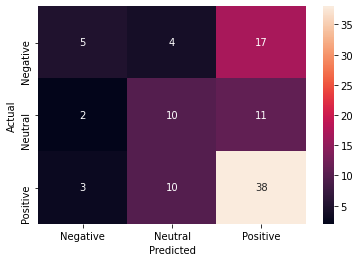

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
rf = RandomForestClassifier()

pipe = make_pipeline(CountVectorizer(), rf)

print(sorted(estimator.get_params().keys()))


parms = [{
    'randomforestclassifier__criterion': ['gini', 'entropy'],
    'randomforestclassifier__max_depth' : [10,15],
    'randomforestclassifier__min_samples_split' : [2,3],
    'randomforestclassifier__min_samples_leaf' : [2,3]
}]
#n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1,
#min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
#min_impurity_split=None, bootstrap=True, oob_score=False, 
#n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

grid = GridSearchCV(estimator = pipe, param_grid = parms, scoring = 'accuracy',cv = 3)
#scoring='accuracy'
#scoring = 'roc_auc'
grid.fit(X_train,y_train)

grid.score(X_train,y_train)
grid.score(X_test,y_test)

pred_rf = grid.predict(X_test)

print(classification_report(y_test,pred_rf))

print('Accuracy: ',metrics.accuracy_score(y_test, pred_rf))

print(confusion_matrix(y_test, pred_rf))


conf_matrix = pd.crosstab(y_test, pred_rf, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)


['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']
dict_keys(['memory', 'steps', 'verbose', 'vectorizer', 'clf', 'vectorizer__memory', 'vectorizer__steps', 'vectorizer__verbose', 'vectorizer__vect', 'vectorizer__tfidf', 'vectorizer__vect__analyzer', 'vectorizer__vect__binary', 'vectorizer__vect__decode_error', 'vectorizer__vect__dtype', 'vectorizer__vect__encoding', 'vectorizer__vect__input', 'vectorizer__vect__lowercase', 'vectorizer__vect__max_df', 'vectorizer__vect__max_features', 'vectorizer__vect__min_df', 'vectorizer__vect__ngram_range', 'vectorizer__vect__preprocessor', 'vectorizer__vect__stop_words', 'vectorizer__vect__strip_accents', 'vectorizer__vect__token_pattern', 'vectorizer__vect__tokenizer', 'vectorizer__vect__v

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('vectorizer',
                                        Pipeline(steps=[('vect',
                                                         CountVectorizer()),
                                                        ('tfidf',
                                                         TfidfTransformer())])),
                                       ('clf', RandomForestClassifier())]),
             param_grid=[{'clf__criterion': ['gini', 'entropy'],
                          'clf__max_depth': [10, 15, 20],
                          'clf__min_samples_leaf': [2, 5, 10],
                          'clf__min_samples_split': [2, 5, 10],
                          'clf__n_estimators': [10, 100],
                          'clf__random_state': [20, 25],
                          'vectorizer__tfidf__use_idf': (True, False),
                          'vectorizer__vect__max_features': [1800, 1500]}],
             scoring='accuracy')

0.865

0.53

              precision    recall  f1-score   support

    Negative       0.71      0.19      0.30        26
     Neutral       0.41      0.52      0.46        23
    Positive       0.56      0.71      0.63        51

    accuracy                           0.53       100
   macro avg       0.56      0.47      0.46       100
weighted avg       0.57      0.53      0.50       100

Accuracy:  0.53
[[ 5  4 17]
 [ 0 12 11]
 [ 2 13 36]]


{'clf__criterion': 'gini',
 'clf__max_depth': 15,
 'clf__min_samples_leaf': 2,
 'clf__min_samples_split': 2,
 'clf__n_estimators': 100,
 'clf__random_state': 20,
 'vectorizer__tfidf__use_idf': False,
 'vectorizer__vect__max_features': 1500}

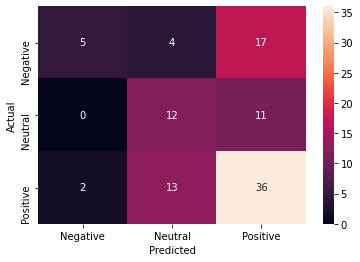

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
rf = RandomForestClassifier()

pipe = Pipeline([
    ('vectorizer', Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer())
    ])), ('clf', rf)
])

estimator = rf
print(sorted(estimator.get_params().keys()))
print(pipe.get_params().keys())

parameters = [{'vectorizer__vect__max_features': [1800, 1500],
#              'transformer__vect__ngram_range': ((1,1),(1,2)),
              'vectorizer__tfidf__use_idf': (True, False),
              'clf__n_estimators' : [10, 100],
              'clf__random_state' : [20,25],
              'clf__criterion': ['gini', 'entropy'],
               'clf__max_depth' : [10,15,20],
               'clf__min_samples_split' : [2,5,10],
               'clf__min_samples_leaf' : [2,5,10]
              }]

grid = GridSearchCV(pipe, param_grid = parameters, scoring = 'accuracy',cv = 4)

grid.fit(X_train,y_train)

grid.score(X_train,y_train)
grid.score(X_test,y_test)

pred_rf = grid.predict(X_test)

print(classification_report(y_test,pred_rf))

print('Accuracy: ',metrics.accuracy_score(y_test, pred_rf))

print(confusion_matrix(y_test, pred_rf))


conf_matrix = pd.crosstab(y_test, pred_rf, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)
#Take a look at the best prediction parameter
y_predBest = grid.best_params_
y_predBest

['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']
dict_keys(['memory', 'steps', 'verbose', 'transformer', 'clf', 'transformer__memory', 'transformer__steps', 'transformer__verbose', 'transformer__vect', 'transformer__tfidf', 'transformer__vect__analyzer', 'transformer__vect__binary', 'transformer__vect__decode_error', 'transformer__vect__dtype', 'transformer__vect__encoding', 'transformer__vect__input', 'transformer__vect__lowercase', 'transformer__vect__max_df', 'transformer__vect__max_features', 'transformer__vect__min_df', 'transformer__vect__ngram_range', 'transformer__vect__preprocessor', 'transformer__vect__stop_words', 'transformer__vect__strip_accents', 'transformer__vect__token_pattern', 'transformer__vect__tokenizer'

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        Pipeline(steps=[('vect',
                                                         CountVectorizer()),
                                                        ('tfidf',
                                                         TfidfTransformer())])),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=1,
             param_grid=[{'transformer__tfidf__use_idf': (True, False),
                          'transformer__vect__max_df': (0.5, 0.75, 1.0),
                          'transformer__vect__max_features': (None, 5000, 10000,
                                                              50000)}],
             scoring='accuracy')

1.0

0.54

              precision    recall  f1-score   support

    Negative       0.58      0.27      0.37        26
     Neutral       0.44      0.70      0.54        23
    Positive       0.60      0.61      0.60        51

    accuracy                           0.54       100
   macro avg       0.54      0.52      0.50       100
weighted avg       0.56      0.54      0.53       100

Accuracy:  0.54
[[ 7  5 14]
 [ 0 16  7]
 [ 5 15 31]]


{'transformer__tfidf__use_idf': True,
 'transformer__vect__max_df': 0.5,
 'transformer__vect__max_features': 10000}

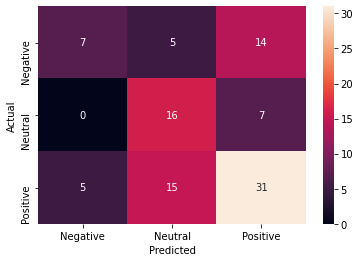

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
rf = RandomForestClassifier()

pipe = Pipeline([
    ('transformer', Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer())
    ])), ('clf', rf)
])

print(sorted(estimator.get_params().keys()))
print(pipe.get_params().keys())

parameters = [{#'transformer__vect__max_features': [1800, 1500],
              'transformer__tfidf__use_idf': (True, False),
#               'transformer__vect__analyzer' : word
               'transformer__vect__max_df': (0.5, 0.75, 1.0),
               'transformer__vect__max_features': (None, 5000, 10000, 50000)
              }]

grid = GridSearchCV(pipe, param_grid = parameters, scoring = 'accuracy',cv = 5, refit=True, n_jobs=1)

grid.fit(X_train,y_train)

grid.score(X_train,y_train)
grid.score(X_test,y_test)

pred_rf = grid.predict(X_test)

print(classification_report(y_test,pred_rf))

print('Accuracy: ',metrics.accuracy_score(y_test, pred_rf))

print(confusion_matrix(y_test, pred_rf))

conf_matrix = pd.crosstab(y_test, pred_rf, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)
#Take a look at the best prediction parameter
y_predBest = grid.best_params_
y_predBest

In [65]:
print("Accuracy with LX model : ", (60+85+76)/500)
print("            ")
print("Accuracy with NB + Transformer Grid search model: ", (2+10+37)/100)
print('TP rate with NB + Transformer Grid search model: ', 37/(2+12+37))
print("            ")
print("Accuracy with RF + Transformer Grid search model: ", (6+15+32)/100)
print('TP rate with RF + Transformer Grid search model: ', 32/(6+12+32))
print("            ")
print("Accuracy with RF classifier Grid search model: ", (4+10+38)/100)
print('TP rate with RF classifier Grid search model: ', 38/(1+12+38))
print("            ")
print("Accuracy with RF + Vectorizer Grid search model : ", (5+12+36)/100)
print('TP rate with RF + Vectorizer Grid search model: ', 36/(2+13+36))
print("            ")
print("Accuracy with RF + Vectorizer Grid search model : ", (4+16+30)/100)
print('TP rate with RF + Vectorizer Grid search model: ', 30/(4+17+30))

Accuracy with LX model :  0.442
            
Accuracy with NB + Transformer Grid search model:  0.49
TP rate with NB + Transformer Grid search model:  0.7254901960784313
            
Accuracy with RF + Transformer Grid search model:  0.53
TP rate with RF + Transformer Grid search model:  0.64
            
Accuracy with RF classifier Grid search model:  0.52
TP rate with RF classifier Grid search model:  0.7450980392156863
            
Accuracy with RF + Vectorizer Grid search model :  0.53
TP rate with RF + Vectorizer Grid search model:  0.7058823529411765
            
Accuracy with RF + Vectorizer Grid search model :  0.5
TP rate with RF + Vectorizer Grid search model:  0.5882352941176471


## Positive and Not Positive

In [14]:
df=pd.read_excel('Tweets_on_Covid_Vaccine_500_rows.xlsx')

In [15]:
df['Tweet'] = df['Tweet'].astype(str)
df['Tweet_lc'] = df['Tweet'].str.lower()
x = df['Tweet_lc']

In [16]:
df['Label'].replace(to_replace='Positive', value=1, inplace=True)
df['Label'].replace(to_replace='Negative',  value=0, inplace=True)
df['Label'].replace(to_replace='Neutral',  value=0, inplace=True)

y = df['Label']

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(x)
#print(vectorizer.get_feature_names())
#X
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
## Get the data
## split the data
## build model on train data
## Validate on test data
## check the results

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# lets see the shape of our train and test datasets

print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (400, 2262)
X_test shape: (100, 2262)


MultinomialNB()

              precision    recall  f1-score   support

           0       0.64      0.73      0.69        49
           1       0.70      0.61      0.65        51

    accuracy                           0.67       100
   macro avg       0.67      0.67      0.67       100
weighted avg       0.67      0.67      0.67       100

Accuracy:  0.67
[[36 13]
 [20 31]]


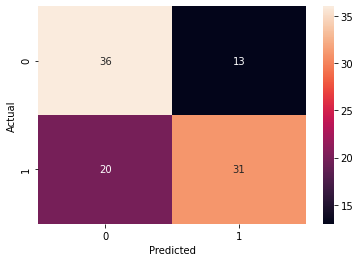

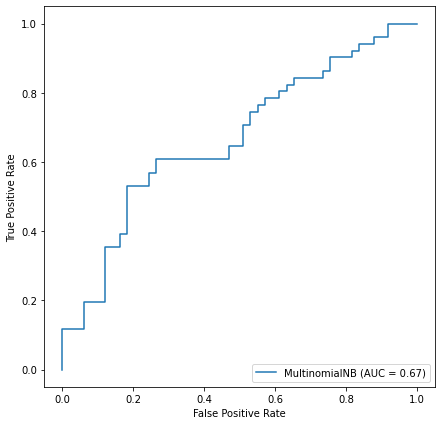

In [30]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)
pred_nb = nb.predict(X_test)
print(classification_report(y_test,pred_nb))
print('Accuracy: ',metrics.accuracy_score(y_test, pred_nb))
print(confusion_matrix(y_test, pred_nb))

conf_matrix = pd.crosstab(y_test, pred_nb, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

# roc plot

fig,ax = plt.subplots(figsize=(7,7))
plot_roc_curve(nb, X_test, y_test, ax = ax)

SVC()

              precision    recall  f1-score   support

           0       0.52      1.00      0.69        49
           1       1.00      0.12      0.21        51

    accuracy                           0.55       100
   macro avg       0.76      0.56      0.45       100
weighted avg       0.77      0.55      0.44       100

Accuracy:  0.55
[[49  0]
 [45  6]]


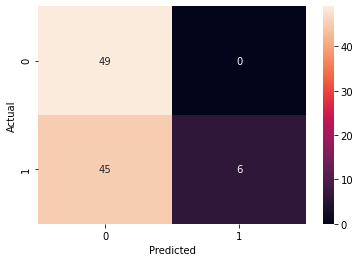

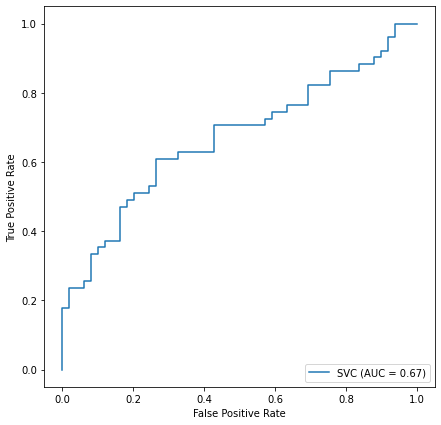

In [31]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
pred_svm = svm.predict(X_test)
print(classification_report(y_test,pred_svm))

print('Accuracy: ',metrics.accuracy_score(y_test, pred_svm))

print(confusion_matrix(y_test, pred_svm))

conf_matrix = pd.crosstab(y_test, pred_svm, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

fig,ax = plt.subplots(figsize=(7,7))
plot_roc_curve(svm, X_test, y_test, ax = ax)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.53      0.98      0.69        49
           1       0.90      0.18      0.30        51

    accuracy                           0.57       100
   macro avg       0.72      0.58      0.49       100
weighted avg       0.72      0.57      0.49       100

Accuracy:  0.57
[[48  1]
 [42  9]]


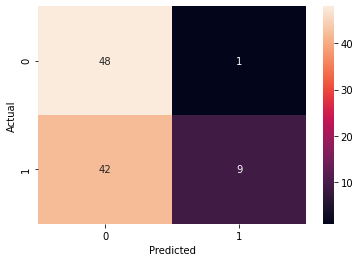

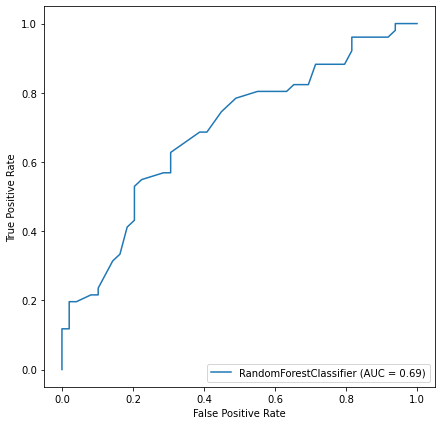

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
print(classification_report(y_test,pred_rf))

print('Accuracy: ',metrics.accuracy_score(y_test, pred_rf))

print(confusion_matrix(y_test, pred_rf))

conf_matrix = pd.crosstab(y_test, pred_rf, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

fig,ax = plt.subplots(figsize=(7,7))
plot_roc_curve(rf, X_test, y_test, ax = ax)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

              precision    recall  f1-score   support

           0       0.56      0.76      0.64        49
           1       0.65      0.43      0.52        51

    accuracy                           0.59       100
   macro avg       0.60      0.59      0.58       100
weighted avg       0.60      0.59      0.58       100

Accuracy:  0.59
[[37 12]
 [29 22]]


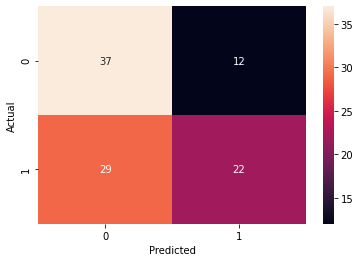

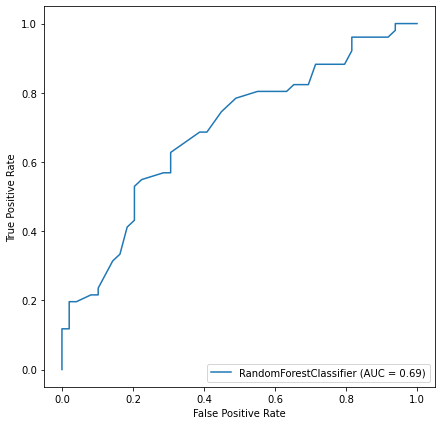

In [33]:
from sklearn.neural_network import MLPClassifier
dl = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1)
dl.fit(X_train,y_train)
pred_dl = dl.predict(X_test)
print(classification_report(y_test,pred_dl))

print('Accuracy: ',metrics.accuracy_score(y_test, pred_dl))

print(confusion_matrix(y_test, pred_dl))

conf_matrix = pd.crosstab(y_test, pred_dl, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

fig,ax = plt.subplots(figsize=(7,7))
plot_roc_curve(rf, X_test, y_test, ax = ax)

In [34]:
print("Accuracy with NB model: ", (36+31)/100)
print('TP rate with NB model: ', 31/(31+20))
print("            ")
print("Accuracy with SVC : ", (49+6)/100)
print('TP rate with SVC model: ', 6/(45+6))
print("            ")
print("Accuracy with RF : ", (48+9)/100)
print('TP rate with RF model: ', 9/(42+9))
print("            ")
print("Accuracy with DL : ", (37+22)/100)
print('TP rate with DL model: ', 22/(22+29))

Accuracy with NB model:  0.67
TP rate with NB model:  0.6078431372549019
            
Accuracy with SVC :  0.55
TP rate with SVC model:  0.11764705882352941
            
Accuracy with RF :  0.57
TP rate with RF model:  0.17647058823529413
            
Accuracy with DL :  0.59
TP rate with DL model:  0.43137254901960786


## Results :

In [68]:
print("    Using Count Vectorizer     " )
print("            ")

print("Accuracy with LX model : ", (60+85+76)/500)
print("            ")
print("Accuracy with NB model: ", (12+11+31)/100)
print('TP rate with NB model: ', 31/(7+13+31))
print("            ")
print("Accuracy with SVC : ", (6+10+33)/100)
print('TP rate with SVC model: ', 33/(3+15+33))
print("            ")
print("Accuracy with RF : ", (4+14+32)/100)
print('TP rate with RF model: ', 32/(4+15+32))
print("            ")
print("Accuracy with DL : ", 0/1)
print('TP rate with DL model: ', 0/1)
print("            ")
print(" ------------------------------       ")


print("    Using TF-IDF Vectorizer     " )
print("            ")
print("Accuracy with NB model: ", (3+8+38)/100)
print('TP rate with NB model: ', 38/(1+12+38))
print("            ")
print("Accuracy with SVC : ", (3+9+39)/100)
print('TP rate with SVC model: ', 39/(2+10+39))
print("            ")
print("Accuracy with RF : ", (8+16+27)/100)
print('TP rate with RF model: ', 27/(7+17+27))
print("            ")
print("Accuracy with DL : ", 0/1)
print('TP rate with DL model: ', 0/1)
print("            ")
print(" ------------------------------       ")

print("    Using Gird Search     " )
print("            ")
print("Accuracy with LX model : ", (60+85+76)/500)
print("            ")
print("Accuracy with NB + Transformer Grid search model: ", (2+10+37)/100)
print('TP rate with NB + Transformer Grid search model: ', 37/(2+12+37))
print("            ")
print("Accuracy with RF + Transformer Grid search model: ", (6+15+32)/100)
print('TP rate with RF + Transformer Grid search model: ', 32/(6+12+32))
print("            ")
print("Accuracy with RF classifier Grid search model: ", (4+10+38)/100)
print('TP rate with RF classifier Grid search model: ', 38/(1+12+38))
print("            ")
print("Accuracy with RF + Vectorizer Grid search model : ", (5+12+36)/100)
print('TP rate with RF + Vectorizer Grid search model: ', 36/(2+13+36))
print("            ")
print("Accuracy with RF + Vectorizer Grid search model : ", (4+16+30)/100)
print('TP rate with RF + Vectorizer Grid search model: ', 30/(4+17+30))
print("            ")
print(" ------------------------------       ")

print("    Positive and Not Positive     " )
print("    Using Count Vectorizer     " )
print("            ")
print("Accuracy with NB model: ", (36+31)/100)
print('TP rate with NB model: ', 31/(31+20))
print("            ")
print("Accuracy with SVC : ", (49+6)/100)
print('TP rate with SVC model: ', 6/(45+6))
print("            ")
print("Accuracy with RF : ", (48+9)/100)
print('TP rate with RF model: ', 9/(42+9))
print("            ")
print("Accuracy with DL : ", (37+22)/100)
print('TP rate with DL model: ', 22/(22+29))

    Using Count Vectorizer     
            
Accuracy with LX model :  0.442
            
Accuracy with NB model:  0.54
TP rate with NB model:  0.6078431372549019
            
Accuracy with SVC :  0.49
TP rate with SVC model:  0.6470588235294118
            
Accuracy with RF :  0.5
TP rate with RF model:  0.6274509803921569
            
Accuracy with DL :  0.0
TP rate with DL model:  0.0
            
 ------------------------------       
    Using TF-IDF Vectorizer     
            
Accuracy with NB model:  0.49
TP rate with NB model:  0.7450980392156863
            
Accuracy with SVC :  0.51
TP rate with SVC model:  0.7647058823529411
            
Accuracy with RF :  0.51
TP rate with RF model:  0.5294117647058824
            
Accuracy with DL :  0.0
TP rate with DL model:  0.0
            
 ------------------------------       
    Using Gird Search     
            
Accuracy with LX model :  0.442
            
Accuracy with NB + Transformer Grid search model:  0.49
TP rate with NB 